In [276]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Git repository has already been created on "https://github.com/SimonUTS24661225/ADV_MLA_AT1". 
## This is second experiment notebook for the SVM model. This Experiment is a new version of Experiment 2 and use various functions which simplify codes in Experiment 1.

## 1. Data Preparation

In [277]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV, KFold
import joblib 

import warnings
warnings.filterwarnings("ignore")

In [278]:
training_data = pd.read_csv('../data/train.csv')
testing_data = pd.read_csv('../data/test.csv')

In [279]:
testing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4970 entries, 0 to 4969
Data columns (total 63 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   team                 4970 non-null   object 
 1   conf                 4970 non-null   object 
 2   GP                   4970 non-null   int64  
 3   Min_per              4970 non-null   float64
 4   Ortg                 4970 non-null   float64
 5   usg                  4970 non-null   float64
 6   eFG                  4970 non-null   float64
 7   TS_per               4970 non-null   float64
 8   ORB_per              4970 non-null   float64
 9   DRB_per              4970 non-null   float64
 10  AST_per              4970 non-null   float64
 11  TO_per               4970 non-null   float64
 12  FTM                  4970 non-null   int64  
 13  FTA                  4970 non-null   int64  
 14  FT_per               4970 non-null   float64
 15  twoPM                4970 non-null   i

In [280]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56091 entries, 0 to 56090
Data columns (total 64 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   team                 56091 non-null  object 
 1   conf                 56091 non-null  object 
 2   GP                   56091 non-null  int64  
 3   Min_per              56091 non-null  float64
 4   Ortg                 56091 non-null  float64
 5   usg                  56091 non-null  float64
 6   eFG                  56091 non-null  float64
 7   TS_per               56091 non-null  float64
 8   ORB_per              56091 non-null  float64
 9   DRB_per              56091 non-null  float64
 10  AST_per              56091 non-null  float64
 11  TO_per               56091 non-null  float64
 12  FTM                  56091 non-null  int64  
 13  FTA                  56091 non-null  int64  
 14  FT_per               56091 non-null  float64
 15  twoPM                56091 non-null 

In [281]:
testing_data['yr'].unique()

array(['Sr', 'Jr', 'So', 'Fr', nan], dtype=object)

In [282]:
testing_data['ht'].unique()

array(['4-Jun', 'Jun-00', '9-Jun', '2-Jun', '3-Jun', '10-Jun', '1-Jun',
       '6-Jun', '5-Jun', '11-Jun', '7-Jun', '8-Jun', '11-May', '8-May',
       '1-Jul', 'Jul-00', '10-May', '3-Jul', '9-May', '2-Jul', '2-May',
       '7-May', '6-May', '4-Jul', nan], dtype=object)

In [283]:
testing_data['num'].unique()

array([25.,  0., 32.,  5.,  1., 30., 33., 45., 12., 41., 24., 51., 22.,
       15., 20., 10.,  2., 11.,  3.,  4., 14., 35., 52., 13., 21., 23.,
       44., 50., 31., 34., 55., nan, 42., 54., 40., 43., 53.])

There are three object columns ('ht', 'yr', 'num') that need to be solved in feature engineering parts.

In [284]:
print('Number of rows in Training Data: "'+str(training_data.shape[0]) + '" and number of columns: "'+str(training_data.shape[1]) + '"')
print('Number of rows in Testing  Data: "'+str(testing_data.shape[0]) + '"  and number of columns: "'+str(testing_data.shape[1]) + '"')

Number of rows in Training Data: "56091" and number of columns: "64"
Number of rows in Testing  Data: "4970"  and number of columns: "63"


## 2. Data Cleaning and Feature Engineerings

In [285]:
missing_cols_training = []

for i in training_data.columns:
    if training_data[i].isnull().sum() > 0:
        missing_cols_training.append(i)
        
missing_cols_training

['yr',
 'ht',
 'num',
 'Rec_Rank',
 'ast_tov',
 'rimmade',
 'rimmade_rimmiss',
 'midmade',
 'midmade_midmiss',
 'rim_ratio',
 'mid_ratio',
 'dunksmade',
 'dunksmiss_dunksmade',
 'dunks_ratio',
 'pick',
 'drtg',
 'adrtg',
 'dporpag',
 'stops',
 'bpm',
 'obpm',
 'dbpm',
 'gbpm',
 'mp',
 'ogbpm',
 'dgbpm',
 'oreb',
 'dreb',
 'treb',
 'ast',
 'stl',
 'blk',
 'pts']

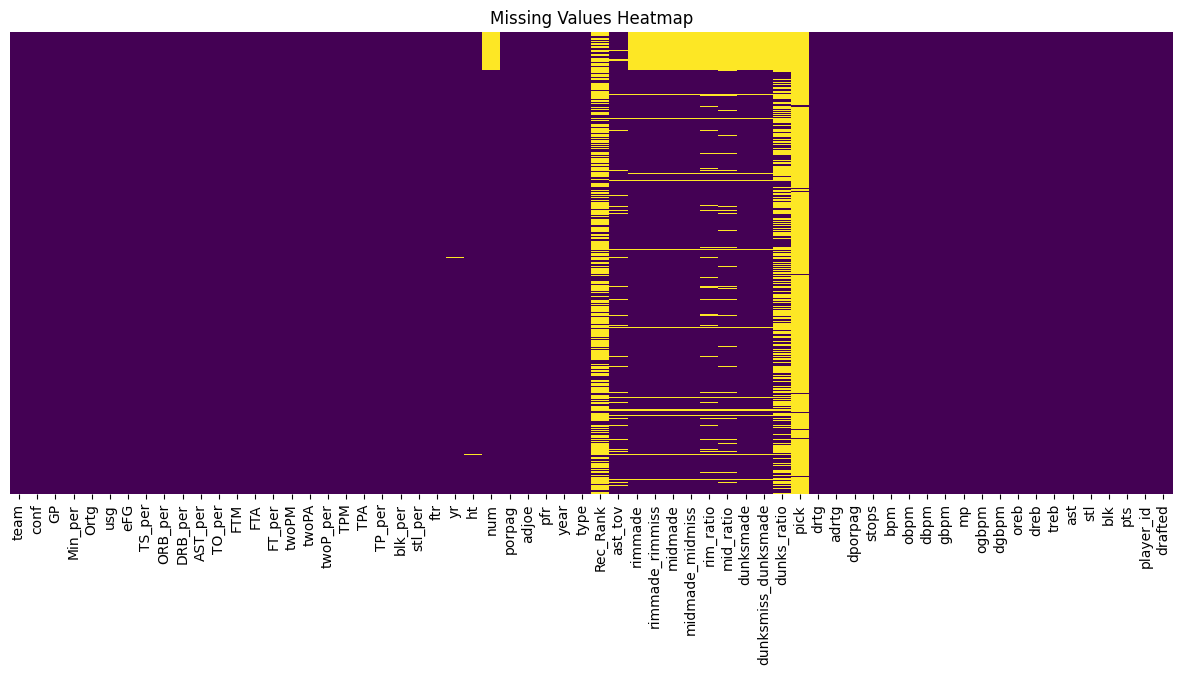

In [286]:
from visualization.visualize import *
plot_missing_values_heatmap(training_data)

In [287]:
missing_cols_testing  = []

for i in testing_data.columns:
    if testing_data[i].isnull().sum() > 0:
        missing_cols_testing.append(i)
        
missing_cols_testing

['yr',
 'ht',
 'num',
 'Rec_Rank',
 'ast_tov',
 'rimmade',
 'rimmade_rimmiss',
 'midmade',
 'midmade_midmiss',
 'rim_ratio',
 'mid_ratio',
 'dunksmade',
 'dunksmiss_dunksmade',
 'dunks_ratio',
 'pick',
 'drtg',
 'adrtg',
 'dporpag',
 'stops',
 'bpm',
 'obpm',
 'dbpm',
 'gbpm',
 'ogbpm',
 'dgbpm']

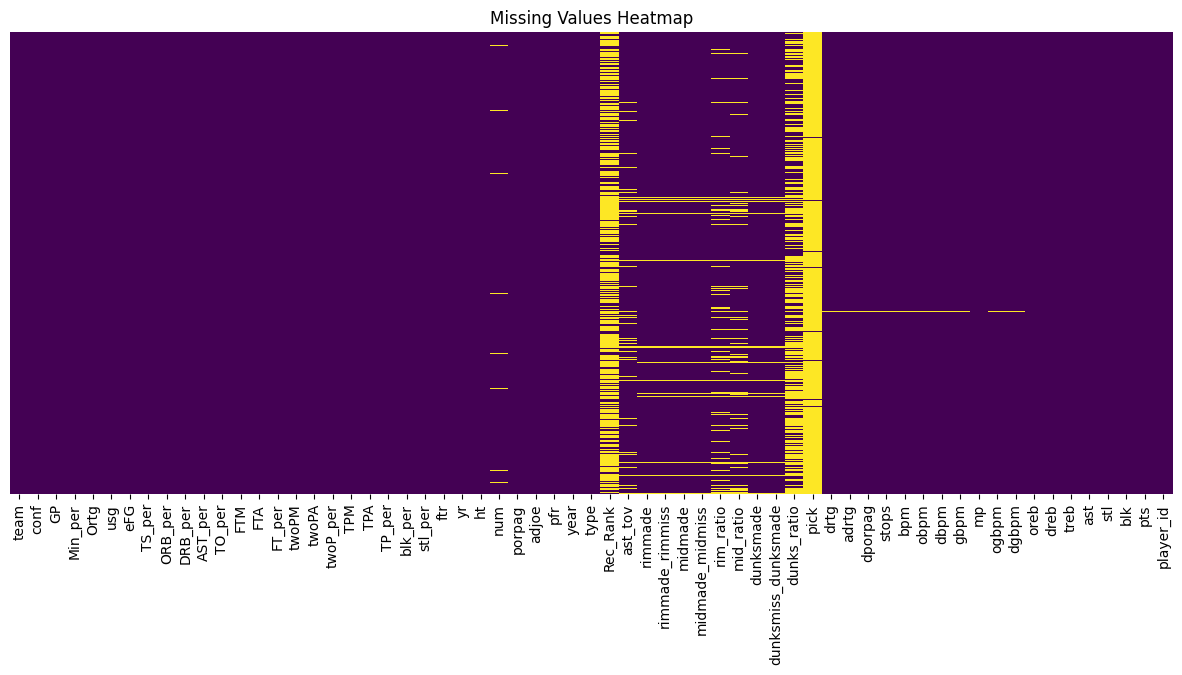

In [288]:
plot_missing_values_heatmap(testing_data)

Same as Experiment 1. Three columns, 'Pick', 'Rec_Rank', 'dunks_ratio' column will be removed  and others will be filled with average of values in columns.

In [289]:
from features.build_features import *
drop_columns(testing_data)
drop_columns(training_data)

In [290]:
columns_to_fill = [
    'ast_tov', 'rimmade', 'rimmade_rimmiss',
    'midmade', 'midmade_midmiss', 'rim_ratio',
    'mid_ratio', 'dunksmade', 'dunksmiss_dunksmade','drtg','adrtg', 'dporpag', 'stops', 'bpm','obpm', 'dbpm','gbpm','ogbpm','dgbpm'
]
fill_missing_with_mean(training_data, columns_to_fill)
fill_missing_with_mean(testing_data, columns_to_fill)

,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,...,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,player_id
0,Morgan St.,MEAC,2,3.0,115.1,4.7,50.0,50.00,0.0,4.6,...,-2.467740,-2.275660,0.0000,0.3333,0.3333,0.0000,0.0000,0.0000,1.0000,cf302b4d-84f7-4124-a25d-a75eed31978b
1,South Carolina St.,MEAC,11,17.6,61.1,18.6,34.7,35.18,2.5,15.7,...,-7.494720,-4.412530,0.2727,1.4545,1.7273,0.4545,0.1818,0.0000,2.3636,f91837cd-4f49-4b70-963d-aeb82c6ce3da
2,Binghamton,AE,9,28.6,91.9,23.8,54.1,52.49,6.4,22.5,...,-2.924950,1.717890,1.3333,4.4444,5.7778,1.0000,0.6667,1.8889,8.8889,53ec2a29-1e7d-4c6d-86d7-d60d02af8916
3,Illinois,B10,7,1.3,111.0,10.4,83.3,83.33,0.0,13.4,...,-0.767911,0.962469,0.0000,0.2857,0.2857,0.0000,0.0000,0.0000,0.7143,32402798-471c-4a54-8cb4-29cd95199014
4,Iowa St.,B12,23,78.5,103.1,21.5,54.0,56.12,3.6,10.2,...,2.893610,-1.019000,1.0435,2.8696,3.9130,1.1739,0.8261,0.0870,14.3043,73b960f9-27b8-4431-9d23-a760e9bbc360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4965,Villanova,BE,2,0.3,60.5,19.3,0.0,0.00,0.0,0.0,...,2.143290,16.018200,0.0000,0.0000,0.0000,0.5000,0.5000,0.0000,0.0000,a25ee55f-02a3-4f8e-8194-a5f427e14e7c
4966,Northwestern St.,Slnd,4,1.3,28.3,7.1,0.0,0.00,7.0,0.0,...,-7.242230,-4.993820,0.2500,0.0000,0.2500,0.0000,0.0000,0.0000,0.0000,d0d9f45e-7b01-44b3-8d40-514ec338611d
4967,Tulane,Amer,1,0.1,0.0,0.0,0.0,0.00,0.0,0.0,...,-3.524820,-1.126810,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,f8df22c4-1602-4fab-896d-8820951aae2f
4968,Texas Tech,B12,1,0.1,0.0,0.0,0.0,0.00,0.0,0.0,...,-1.876040,-2.380750,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,b791c69a-f769-4163-afda-051a6fd20a9d


In [291]:
training_data.dropna(inplace=True)

In [294]:
assert training_data.columns.isna().sum() == 0
assert testing_data.columns.isna().sum() == 0

In [295]:
print(training_data.duplicated().sum())
print(testing_data.duplicated().sum())

0
0


In [268]:
training_data['ht'].unique()

array(['6-Jun', '3-Jun', '2-Jun', '5-Jun', 'Jun-00', '4-Jun', '11-Jun',
       '7-Jun', '10-May', '10-Jun', '8-Jun', '9-Jun', '1-Jun', '11-May',
       'Jul-00', '9-May', '5-Jul', '8-May', 'Apr-00', '7-May', '1-Jul',
       '2-Jul', '6-May', '5-May', '3-Jul', '-', '4-Jul', '4-May', '0',
       '1-May', '3-May', '6-Jul', '5-Apr', '2-May'], dtype=object)

In [296]:
training_data['num'].unique()

array(['53', '5', '14', '22', '20', '34', '24', '54', '15', '13', '10',
       '21', '32', '12', '51', '31', '33', '1', '45', '50', '3', '23',
       '2', '4', '55', '35', '42', '25', '41', '52', '11', '40', '30',
       '43', '0', '44', '23B', 2.0, 15.0, 11.0, 0.0, 5.0, 34.0, 24.0,
       22.0, 1.0, 32.0, 23.0, 14.0, 20.0, 4.0, 33.0, 25.0, 40.0, 43.0,
       3.0, 12.0, 10.0, 30.0, 21.0, 31.0, 13.0, 50.0, 44.0, 41.0, 35.0,
       42.0, 45.0, 55.0, 54.0, 53.0, 52.0, 51.0, 26.0, '99', '4A',
       '31/24', '--', 99.0], dtype=object)

In [298]:
testing_data['yr'].unique()

array(['Sr', 'Jr', 'So', 'Fr', nan], dtype=object)

For 'yr' and 'num' columns, categorical values will be replaced to numeric values and also data types will be changed to float or integer.
For 'ht', it indicates the height of players. But the values are ambiguous, since decided to exclude it. 

In [270]:
def replace_values_in_columns(training_data, testing_data):
    """
    Replace specific values in 'num' and 'yr' columns of training and testing DataFrames.

    Parameters:
        training_data (pd.DataFrame): The training DataFrame.
        testing_data (pd.DataFrame): The testing DataFrame.

    Returns:
        training_data (pd.DataFrame): Training DataFrame with values replaced.
        testing_data (pd.DataFrame): Testing DataFrame with values replaced.
    """
    # Replacements for 'num' column
    num_replacements = {
        'None': 0,
        '23B': '23',
        '4A': '4',
        '31/24': '31',
        '--': '0'
    }

    training_data['num'].replace(num_replacements, inplace=True)
    testing_data['num'].replace(num_replacements, inplace=True)


    # Replacements for 'yr' column
    yr_replacements = {
        'Fr': 1,
        'So': 2,
        'Jr': 3,
        'Sr': 4,
        'None': 0
    }

    training_data['yr'].replace(yr_replacements, inplace=True)
    testing_data['yr'].replace(yr_replacements, inplace=True)


    return training_data, testing_data

In [299]:
replace_values_in_columns(training_data, testing_data)

(                   team  conf  GP  Min_per   Ortg   usg    eFG  TS_per  \
 2336   Georgia Southern    SC  23     29.5   99.0  17.2   47.1   49.32   
 4589           Utah St.   WAC  32     64.0  108.3  18.1   53.0   53.33   
 4590             Butler  Horz  11      1.0  121.1  16.8   75.0   75.00   
 4591           Longwood   ind  27     81.8   99.8  27.7   49.9   53.76   
 4592            Fordham   A10   7      1.3    0.0   0.0    0.0    0.00   
 ...                 ...   ...  ..      ...    ...   ...    ...     ...   
 56086           Niagara  MAAC   1      0.1    0.0  48.9    0.0    0.00   
 56087  Northwestern St.  Slnd   1      0.2  206.9  35.9  100.0  102.56   
 56088    Texas Southern  SWAC   1      0.6   48.5  28.9    0.0   52.63   
 56089        Vanderbilt   SEC   1      0.1  300.0  20.0  150.0  150.00   
 56090       Chicago St.   WAC  19     21.9   55.0  16.4   24.5   30.60   
 
        ORB_per  DRB_per  ...      dgbpm    oreb    dreb    treb     ast  \
 2336       3.7     12

In [300]:
testing_data['yr'].fillna(0, inplace=True)
testing_data['yr'].unique()

array([4., 3., 2., 1., 0.])

In [306]:
convert_columns_to_num(training_data, testing_data)

(                   team  conf  GP  Min_per   Ortg   usg    eFG  TS_per  \
 2336   Georgia Southern    SC  23     29.5   99.0  17.2   47.1   49.32   
 4589           Utah St.   WAC  32     64.0  108.3  18.1   53.0   53.33   
 4590             Butler  Horz  11      1.0  121.1  16.8   75.0   75.00   
 4591           Longwood   ind  27     81.8   99.8  27.7   49.9   53.76   
 4592            Fordham   A10   7      1.3    0.0   0.0    0.0    0.00   
 ...                 ...   ...  ..      ...    ...   ...    ...     ...   
 56086           Niagara  MAAC   1      0.1    0.0  48.9    0.0    0.00   
 56087  Northwestern St.  Slnd   1      0.2  206.9  35.9  100.0  102.56   
 56088    Texas Southern  SWAC   1      0.6   48.5  28.9    0.0   52.63   
 56089        Vanderbilt   SEC   1      0.1  300.0  20.0  150.0  150.00   
 56090       Chicago St.   WAC  19     21.9   55.0  16.4   24.5   30.60   
 
        ORB_per  DRB_per  ...      dgbpm    oreb    dreb    treb     ast  \
 2336       3.7     12

Datasets will be split into categorical and numeric datasets.

In [307]:
# Spliting into numeric and categorical columns
num_cols_training = training_data.select_dtypes(exclude='object')
cat_cols_training = training_data.select_dtypes(include='object')

num_cols_training.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51124 entries, 2336 to 56090
Data columns (total 56 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   GP                   51124 non-null  int64  
 1   Min_per              51124 non-null  float64
 2   Ortg                 51124 non-null  float64
 3   usg                  51124 non-null  float64
 4   eFG                  51124 non-null  float64
 5   TS_per               51124 non-null  float64
 6   ORB_per              51124 non-null  float64
 7   DRB_per              51124 non-null  float64
 8   AST_per              51124 non-null  float64
 9   TO_per               51124 non-null  float64
 10  FTM                  51124 non-null  int64  
 11  FTA                  51124 non-null  int64  
 12  FT_per               51124 non-null  float64
 13  twoPM                51124 non-null  int64  
 14  twoPA                51124 non-null  int64  
 15  twoP_per             51124 non-null  f

In [308]:
# Spliting into numeric and categorical columns
num_cols_testing = testing_data.select_dtypes(exclude='object')
cat_cols_testing = testing_data.select_dtypes(include='object')
num_cols_testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4970 entries, 0 to 4969
Data columns (total 55 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   GP                   4970 non-null   int64  
 1   Min_per              4970 non-null   float64
 2   Ortg                 4970 non-null   float64
 3   usg                  4970 non-null   float64
 4   eFG                  4970 non-null   float64
 5   TS_per               4970 non-null   float64
 6   ORB_per              4970 non-null   float64
 7   DRB_per              4970 non-null   float64
 8   AST_per              4970 non-null   float64
 9   TO_per               4970 non-null   float64
 10  FTM                  4970 non-null   int64  
 11  FTA                  4970 non-null   int64  
 12  FT_per               4970 non-null   float64
 13  twoPM                4970 non-null   int64  
 14  twoPA                4970 non-null   int64  
 15  twoP_per             4970 non-null   f

In [309]:
num_cols_training.describe().T.style.background_gradient()

,count,mean,std,min,25%,50%,75%,max
GP,51124.000000,23.545536,10.007369,1.000000,17.000000,28.000000,31.000000,41.000000
Min_per,51124.000000,37.557257,28.014047,0.000000,9.900000,36.300000,62.400000,96.700000
Ortg,51124.000000,92.306117,30.067360,0.000000,84.600000,97.400000,107.100000,834.000000
usg,51124.000000,18.164627,6.152037,0.000000,14.575000,18.100000,21.800000,50.000000
eFG,51124.000000,44.803499,18.002229,0.000000,40.400000,47.800000,53.300000,150.000000
TS_per,51124.000000,47.906806,17.189716,0.000000,44.160000,50.930000,56.130000,150.000000
ORB_per,51124.000000,5.536016,9.541731,0.000000,1.800000,4.300000,8.100000,1576.600000
DRB_per,51124.000000,12.735701,10.988630,0.000000,8.500000,11.900000,16.100000,1385.000000
AST_per,51124.000000,10.840284,9.272153,0.000000,4.700000,9.100000,15.100000,100.000000
TO_per,51124.000000,20.193981,12.021619,0.000000,14.700000,19.000000,24.300000,100.000000


In [310]:
num_cols_testing.describe().T.style.background_gradient()

,count,mean,std,min,25%,50%,75%,max
GP,4970.000000,15.865795,8.276655,1.000000,9.000000,17.000000,22.000000,33.000000
Min_per,4970.000000,34.906881,27.921356,0.100000,6.700000,32.350000,59.900000,96.000000
Ortg,4970.000000,89.500644,35.338827,0.000000,80.900000,96.800000,107.100000,391.200000
usg,4970.000000,17.867626,6.780159,0.000000,14.200000,18.000000,21.800000,48.200000
eFG,4970.000000,43.657203,20.716630,0.000000,38.400000,48.100000,54.000000,150.000000
TS_per,4970.000000,46.538342,19.992005,0.000000,42.340000,50.850000,56.780000,150.000000
ORB_per,4970.000000,5.168390,7.030561,0.000000,1.400000,3.700000,7.400000,231.800000
DRB_per,4970.000000,13.048753,9.248595,0.000000,8.400000,12.300000,16.800000,121.100000
AST_per,4970.000000,10.356801,9.427192,0.000000,4.300000,8.600000,14.500000,100.000000
TO_per,4970.000000,18.962254,13.255566,0.000000,13.100000,18.100000,23.400000,100.000000


In [311]:
num_cols_testing['num'].fillna(num_cols_testing['num'].mean(), inplace=True)

Missing values in 'num' column was filled with mean of values. 

## 3. Data Split

In [312]:
X_train = num_cols_training.drop(['drafted'], axis=1)
y_train = num_cols_training['drafted']


In [313]:
# Unit Tests
assert y_train.shape == (51124, )
assert X_train.shape == (51124, 55)

In [314]:
y_train.value_counts(normalize=True)

drafted
0.0    0.990415
1.0    0.009585
Name: proportion, dtype: float64

In [315]:
X_test = num_cols_testing

In [316]:
# Unit Tests
assert X_test.shape == (4970, 55)

In [317]:
X_train.to_csv('../data/X_train.csv', index=False)
X_test.to_csv('../data/X_test.csv', index=False)
y_train.to_csv('../data/y_train.csv', index=False)

Those CSVs may be used in further experiments.

## 4. Data Scaling

In [318]:
std_scaler = StandardScaler()

In [319]:
std_scaler.fit(X_train)

StandardScaler()

In [320]:
X_train_std_scaled = std_scaler.transform(X_train)
X_test_std_scaled = std_scaler.transform(X_test)

## 5. Assess Baseline Model

In [321]:
y_mode = y_train.mode()

In [322]:
y_base = np.full(y_train.shape, y_mode)

In [323]:
# Unit Tests
assert isinstance(y_base, np.ndarray)
assert y_base.shape == y_train.shape

In [324]:
auc_score = roc_auc_score(y_train, y_base)
print("AUROC Score:", auc_score)

AUROC Score: 0.5


## 6. Train a Default LightBGM Model 

In [325]:
lgb_model = lgb.LGBMClassifier(objective='binary', metric='auc')
lgb_model.fit(X_train_std_scaled, y_train)

[LightGBM] [Info] Number of positive: 490, number of negative: 50634
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009424 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12217
[LightGBM] [Info] Number of data points in the train set: 51124, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.009585 -> initscore=-4.637973
[LightGBM] [Info] Start training from score -4.637973


LGBMClassifier(metric='auc', objective='binary')

In [347]:
train_pred_prob1 = lgb_model.predict_proba(X_train_std_scaled)
print(train_pred_prob1.shape)

(51124, 2)


In [327]:
auroc_score1 = roc_auc_score(y_train, train_pred_prob1[:,1])
print(auroc_score1)

1.0


## 7. Hyperparameter Tuning with RandomSearchCV

In [328]:
param_dist = {
    'boosting_type': ['gbdt', 'dart', 'goss', 'rf'],
    'num_leaves': randint(20, 200),
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': randint(3, 15),
    'min_child_samples': randint(1, 50),
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.01, 0.1, 0.5, 1.0],
    'reg_lambda': [0, 0.01, 0.1, 0.5, 1.0]
}

In [329]:
lgb_model_hyper = lgb.LGBMClassifier(objective='binary', metric='auc')

In [330]:
random_search = RandomizedSearchCV(
    lgb_model_hyper, param_distributions=param_dist, random_state=42
)

In [331]:
random_search.fit(X_train_std_scaled, y_train)

[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 392, number of negative: 40507
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007530 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12175
[LightGBM] [Info] Number of data points in the train set: 40899, number of used features: 55
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.009585 -> initscore=-4.637968
[LightGBM] [Info] Start training from score -4.637968
[LightGBM] [Warning] Found boosting=goss. For bac

RandomizedSearchCV(estimator=LGBMClassifier(metric='auc', objective='binary'),
                   param_distributions={'boosting_type': ['gbdt', 'dart',
                                                          'goss', 'rf'],
                                        'colsample_bytree': [0.7, 0.8, 0.9,
                                                             1.0],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2,
                                                          0.3],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000020E377CE910>,
                                        'min_child_samples': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000020E37C72E10>,
                                        'num_leaves': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000020E37C739D0>,
                                        'reg_alpha': [0, 0.01, 0.1, 0.5, 1.0],
                                        'reg_lambda': [0, 0.01, 0.1, 0.5, 1.0],
                                        'subsample': [0.7, 0.8, 0.9, 1.0]},
                   random_state=42)

In [332]:
random_search.best_params_

{'boosting_type': 'gbdt',
 'colsample_bytree': 0.9,
 'learning_rate': 0.05,
 'max_depth': 12,
 'min_child_samples': 44,
 'num_leaves': 181,
 'reg_alpha': 0.01,
 'reg_lambda': 0.5,
 'subsample': 0.8}

In [333]:
best_model = random_search.best_estimator_

In [334]:
train_pred_prob2 = best_model.predict_proba(X_train_std_scaled)
print(train_pred_prob2.shape)

(51124, 2)


In [335]:
auroc_score2 = roc_auc_score(y_train, train_pred_prob2[:,1])
print(auroc_score2)

1.0


## 8. Visualising ROC curve of models

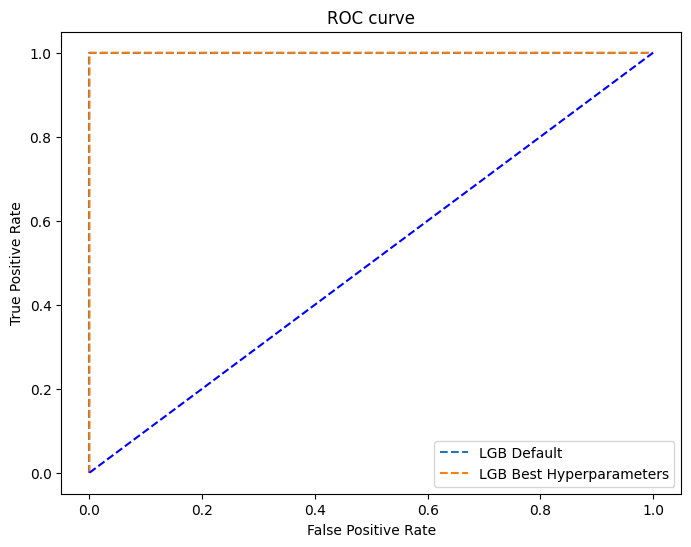

In [340]:
plot_roc_curve(y_train, [train_pred_prob1, train_pred_prob2], ['LGB Default', 'LGB Best Hyperparameters'])

Default LGBclassfier model showed a better performance in AUROC score than LGBclassfier with tuning parameters on Training dataset.

## 9. Predicting the probabilities on Testing Dataset

In [341]:
test_pred_prob1 = lgb_model.predict_proba(X_test_std_scaled)
test_pred_prob2 = best_model.predict_proba(X_test_std_scaled)

In [342]:
cat_cols_testing = pd.read_csv('../data/cat_cols_testing.csv')

In [344]:
playerid = cat_cols_testing['player_id']
player_id = pd.DataFrame({'player_id': playerid})
player_id = player_id.reset_index(drop=True)

draft1 = test_pred_prob1[:, 1]
drafted1 = pd.DataFrame({'drafted': draft1})

draft2 = test_pred_prob2[:, 1]
drafted2 = pd.DataFrame({'drafted': draft2})


prediction_model2 = pd.concat([player_id, drafted1], axis=1)
prediction_model2

prediction_model2_1 = pd.concat([player_id, drafted2], axis=1)
prediction_model2_1

,player_id,drafted
0,cf302b4d-84f7-4124-a25d-a75eed31978b,0.000076
1,f91837cd-4f49-4b70-963d-aeb82c6ce3da,0.000076
2,53ec2a29-1e7d-4c6d-86d7-d60d02af8916,0.000130
3,32402798-471c-4a54-8cb4-29cd95199014,0.000076
4,73b960f9-27b8-4431-9d23-a760e9bbc360,0.000384
...,...,...
4965,a25ee55f-02a3-4f8e-8194-a5f427e14e7c,0.000193
4966,d0d9f45e-7b01-44b3-8d40-514ec338611d,0.000076
4967,f8df22c4-1602-4fab-896d-8820951aae2f,0.000076
4968,b791c69a-f769-4163-afda-051a6fd20a9d,0.000076


prediction_model2 indicates Default LGB model and prediction_model2_1 indicates LGB model with best hyperparameters.

In [345]:
prediction_model2.to_csv('../data/prediction_model2.csv', index=False)
prediction_model2_1.to_csv('../data/prediction_model2_1.csv', index=False)

On testing dataset, Default LGB model obtained 0.98366 AUROC SCORE and LGB model with best hyperparameters obtained 0.98392 AUROC score from Kaggle.

In [346]:
joblib.dump(lgb_model, '../models/LGB_default.joblib')
joblib.dump(best_model, '../models/LGB_best_model.joblib')

['../models/LGB_best_model.joblib']